Antes que nada hay que instalar algunas cosas dentro del container para poder usar la 
libreria GDAL
```bash
docker exec --user root -it 
sudo apt-get install libgdal-dev
gdal-config --version
```
Con la version de gdal del ultimo paso
```bash
pip install GDAL==version
```
Finalmento lo **único** que terminó funcionando fue 
```bash
conda install -c conda-forge gdal
```



## importamos la libreria y abrimos un archivo shape

In [34]:
from osgeo import gdal, ogr, osr

driver = ogr.GetDriverByName('ESRI Shapefile')
file = 'shapefiles/cesac.shp'
shp = driver.Open(file)



## Layer
el shapefile se puede cargar como un layer al obtener el layer del archivo con

```python
layer = shp.GetLayer()
```
de este mismo layer se puede acceder a sus atributos con las siguientes tres funciones
*  layer.GetSpatialRef(): No retorna el sistema de referencia (proyeccion del layer)
*  layer.GetLayerDefn(): Nos da la definición de la capa desde la cual se pueden obtener los atributos sus nombres y tipos con 
   *  layerDefinition.GetFieldDefn(i).GetName()
   *  fieldTypeCode = layerDefinition.GetFieldDefn(i).GetType()
   *  fieldType = layerDefinition.GetFieldDefn(i).GetFieldTypeName(fieldTypeCode)
   *  fieldWidth = layerDefinition.GetFieldDefn(i).GetWidth()
   *  GetPrecision = layerDefinition.GetFieldDefn(i).GetPrecision()
   
por último podemos acceder a cada feature cargado en el layer con:
```python
feature = layer.GetNextFeature()
```

### Proyeccion

In [35]:
layer = shp.GetLayer()
spatialRef = layer.GetSpatialRef()
print(spatialRef)

PROJCS["Transverse_Mercator",
    GEOGCS["GCS_International 1909 (Hayford)",
        DATUM["D_unknown",
            SPHEROID["intl",6378388,297]],
        PRIMEM["Greenwich",0],
        UNIT["Degree",0.0174532925199433]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",-34.6297166],
    PARAMETER["central_meridian",-58.4627],
    PARAMETER["scale_factor",0.999998],
    PARAMETER["false_easting",100000],
    PARAMETER["false_northing",100000],
    UNIT["Meter",1],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH]]


### las definiciones de la capa

In [36]:
# Get Shapefile Fields and Types
layerDefinition = layer.GetLayerDefn()

print( "Name  -  Type  Width  Precision")
for i in range(layerDefinition.GetFieldCount()):
    fieldName =  layerDefinition.GetFieldDefn(i).GetName()
    fieldTypeCode = layerDefinition.GetFieldDefn(i).GetType()
    fieldType = layerDefinition.GetFieldDefn(i).GetFieldTypeName(fieldTypeCode)
    fieldWidth = layerDefinition.GetFieldDefn(i).GetWidth()
    GetPrecision = layerDefinition.GetFieldDefn(i).GetPrecision()
    print(fieldName + " - " + fieldType+ " " + str(fieldWidth) + " " + str(GetPrecision))

Name  -  Type  Width  Precision
ID - Real 19 0
NOMBRE - String 18 0
OBJETO - String 250 0
DOM_NORMA - String 52 0
DOM_GEO - String 52 0
DOM_MAPA - String 200 0
TELEFONO - String 100 0
AREA_PROG - String 100 0
REGION_SAN - String 50 0
COMUNA - String 50 0
BARRIO - String 50 0
JEFE - String 100 0
CELULAR - String 23 0
ESPECIAL - String 254 0
MAIL - String 200 0


### Features

In [39]:
layer = shp.GetLayer()
'''
inFeature = layer.GetNextFeature()
while inFeature:

    # get the cover attribute for the input feature
    name = inFeature.GetField('nombre')
    #print(inFeature.ExportToJson())
    print(name)

    # destroy the input feature and get a new one
    inFeature = None
    inFeature = layer.GetNextFeature()
''' 
for feature in layer:
#    print(i)
#    feature = layer.GetFeature(i)
    print(feature.ExportToJson())


# GEOPANDAS
```bash
pip install geopandas
pip intall descartes
```

In [82]:
import geopandas as gpd
mundo_file = 'shapefiles/mundo_zonas_climaticas.shp'
mundo_gdf = gpd.read_file(file)


## Categorizando por columna

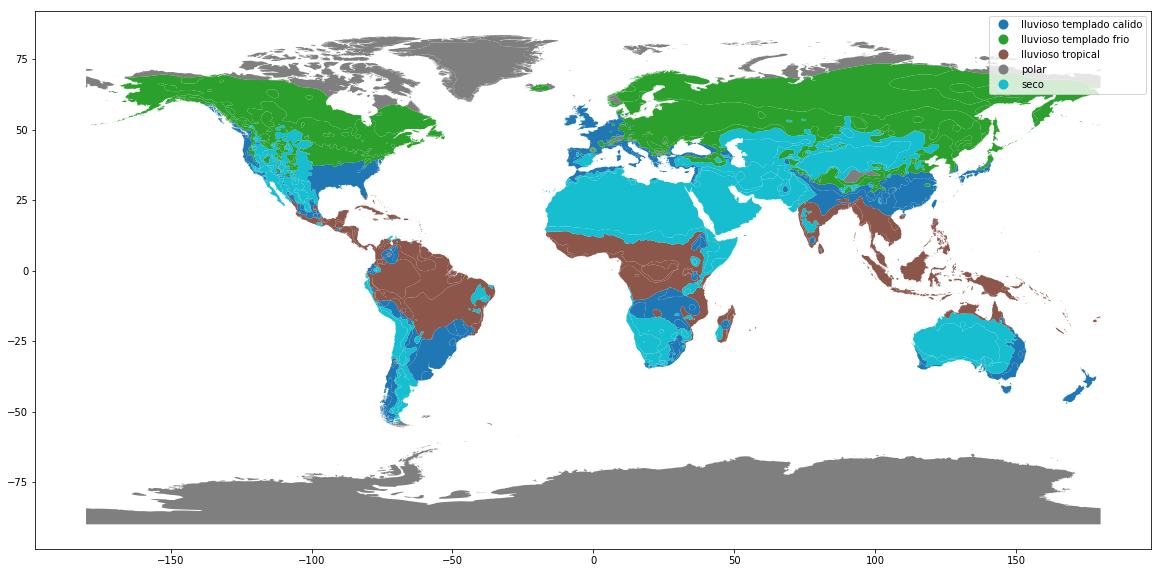

In [83]:
%matplotlib inline
mundo_gdf.plot(column='TEXTO', cmap=None, legend=True, figsize=(20, 20))

## dibujando dos capas
tal vez no se pueden agrandar porque las capas estan en distintos sistemas de coordeandas

In [89]:
provincias_file = 'shapefiles/provincias.shp'
departamentos_file = 'shapefiles/departamentosWGS.shp'
provincias_gdf = gpd.read_file(provincias_file)
departamentos_gdf = gpd.read_file(departamentos_file)

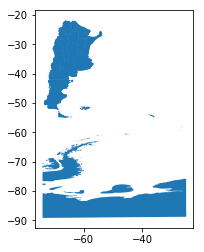

<Figure size 1440x1440 with 0 Axes>

In [100]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1)
provincias_gdf.plot(ax=ax)
departamentos_gdf.plot(ax=ax,cmap=None)
plt.figure(figsize=(20,20))
plt.show()

In [96]:
# view the spatial extent
departamentos_gdf.total_bounds


array([-73.56477444, -60.79800481, -26.45670619, -21.78113479])

In [105]:

#Filas y columnas en el data frame
print(provincias_gdf.shape)
#serie con los tipos de geometrias que tiene el shape
provincias_gdf.geom_type

(24, 6)


0          Polygon
1          Polygon
2          Polygon
3          Polygon
4     MultiPolygon
5     MultiPolygon
6          Polygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11         Polygon
12    MultiPolygon
13    MultiPolygon
14    MultiPolygon
15         Polygon
16         Polygon
17         Polygon
18         Polygon
19         Polygon
20         Polygon
21    MultiPolygon
22    MultiPolygon
23         Polygon
dtype: object

## Transformacion de coordenadas

In [121]:
from pyproj import Proj, transform

In [123]:
projPosgar4 = Proj(init='epsg:5346')
projWGS84 = Proj(init='epsg:4326')
x1_wgs,y1_wgs = -64.5,-24
x2_wgs,y2_wgs = -61.5,-24
x1_posgar,y1_posgar = transform(projWGS84,projPosgar4,x1_wgs,y1_wgs)
x2_posgar,y2_posgar = transform(projWGS84,projPosgar4,x2_wgs,y2_wgs)
print (x1_posgar,y1_posgar)
print (x2_posgar,y2_posgar)
print(x2_posgar - x1_posgar)
coordenadas = []
for i in range(100):
    coordWGS = transform(projPosgar4, projWGS84, x1_posgar, y1_posgar)
    y1_posgar = y1_posgar - 50000
    coordenadas.append(coordWGS)        
coordenadas

4347360.588917001 7345864.271756036
4652639.411082999 7345864.271756036
305278.8221659977


[(-64.5, -24.00000000000001),
 (-64.50529677518024, -24.45126446416421),
 (-64.51072462058397, -24.902500899690807),
 (-64.51628562435852, -25.353708911033248),
 (-64.52198194395665, -25.804888108793346),
 (-64.52781580836839, -26.256038109780004),
 (-64.53378952045257, -26.70715853706508),
 (-64.53990545937323, -27.158249020035985),
 (-64.54616608314574, -27.609309194445245),
 (-64.55257393129831, -28.060338702456626),
 (-64.55913162765457, -28.51133719268808),
 (-64.56584188324322, -28.962304320251157),
 (-64.57270749934152, -29.41323974678689),
 (-64.57973137065908, -29.86414314049795),
 (-64.58691648866952, -30.315014176177268),
 (-64.59426594509766, -30.765852535232582),
 (-64.60178293557038, -31.216657905707187),
 (-64.60947076343984, -31.667429982296433),
 (-64.61733284378838, -32.11816846636024),
 (-64.62537270762483, -32.568873065931044),
 (-64.63359400628295, -33.019543495717414),
 (-64.64200051603247, -33.470179477102995),
 (-64.65059614291546, -33.92078073814072),
 (-64.659